In [478]:
from sympy import *
from sympy.abc import x
from sympy.parsing.sympy_parser import parse_expr
from sympy.plotting import plot
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
init_printing(use_latex = 'mathjax')

In [479]:
def parseInput(filename): #input format: f /n a b eps
    with open(filename) as f:
        lines = f.readlines()
    func = parse_expr(lines[0])
    a, b, eps = map(float, lines[1].split())
    return func, a, b, eps

### Partition integral into pieces and calculate approximation

In [480]:
def calcInt(func, a, b, n, approx):
    res = .0
    point = a
    delta = (b - a) / n
    for i in range(n):
        res = res + approx(func, point, point + delta)
        point = point + delta
    return res

### Simple function maximum finder

In [481]:
def findMax(func, a, b, n):
    M = -1e9
    point = a
    delta = (b - a) / n
    for i in range(n):
        M = max(M, abs(func(point)))
        point = point + delta
    return M

# And main part actually

Our function interval and accuracy


      2 
    -x  
    ────
     2  
√2⋅ℯ    
────────
  2⋅√π  

a = -2.0, b = 2.0, eps = 0.01


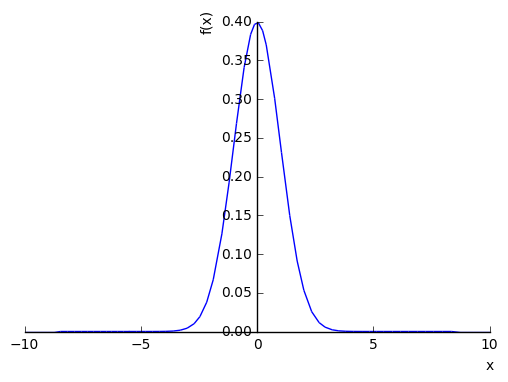

In [482]:
func, a, b, eps = parseInput("input.txt")
print("Our function interval and accuracy")
display(func)
print("a = {}, b = {}, eps = {}".format(a, b, eps))
plot(func)

In [483]:
lam_func = lambdify(x, func) #convert sympy function to python, works 2 magnitudes faster
n = 1000 #number of intervals to find maximum of function, chosen arbitrary

# Rectangle method goes first

### Left rectangle method

In [484]:
def leftRecApprox(func, a, b):
    return (b - a)* func(a)

In [485]:
def leftRecCalcN(a, b, maxF, eps): #maxF - maximum of f' on (a, b)
    return int(pow((b - a),2) * maxF / (2 * eps)) + 1

### Central rectangle method

In [486]:
def centrRecApprox(func, a, b):
    return (b - a) * func((a + b) / 2)

In [487]:
def centrRecCalcN(a, b, maxF, eps): #maxF - maximum of f'' on (a, b)
    return int(pow((b - a),3) * maxF / (24 * eps)) + 1

### Right rectangle method

In [488]:
def rightRecApprox(func, a, b):
    return (b - a) * func(b)

In [489]:
def rightRecCalcN(a, b, maxF, eps): #maxF - maximum of f' on (a, b)
    return int(pow((b - a),2) * maxF / (2 * eps)) + 1

In [490]:
print("Left")
dfunc = diff(func, x)
lam_dfunc = lambdify(x, func)
maxF = findMax(lam_dfunc, a, b, n)
n1l = leftRecCalcN(a, b, maxF, eps)
display(n1l)
res1l = calcInt(lam_func, a, b, n1l, leftRecApprox)
display(res1l)

print("Right")
n1r = rightRecCalcN(a, b, maxF, eps)
display(n1r)
res1r = calcInt(lam_func, a, b, n1r, rightRecApprox)
display(res1r)

print("Central")
ddfunc = diff(func, x)
lam_ddfunc = lambdify(x, func)
maxF = findMax(lam_ddfunc, a, b, n)
n1 = centrRecCalcN(a, b, maxF, eps)
display(n1)
res1 = calcInt(lam_func, a, b, n1, centrRecApprox)
display(res1)

Left


320

0.9544969240814584

Right


320

0.9544969240814584

Central


107

0.9545123110045266

# Trapezia method

In [491]:
def trapeziaApprox(func, a, b):
    return (b - a) * (func(a) + func(b)) / 2

In [492]:
def trapeziaCalcN(a, b, maxF, eps): #maxF - maximum of f'' on (a, b)
    return int(pow(pow((b - a),3) * maxF / (12 * eps), 1./2)) + 1

In [493]:
n2 = trapeziaCalcN(a, b, maxF, eps)
display(n2)
res2 = calcInt(lam_func, a, b, n1, leftRecApprox)
display(res2)

15

0.9544745858623539

# Last but not least, Simpson's method

In [494]:
def simpsonApprox(func, a, b):
    return (b - a) * (func(a) + 4 * func((a + b) / 2) + func(b)) / 6

In [495]:
def simpsonCalcN(a, b, maxF, eps): #maxF - maximum of f'''' on (a, b)
    return int(pow(pow((b - a),5) * maxF / (2880 * eps), 1./4)) + 1

In [496]:
d4func = diff(diff(ddfunc, x), x)
lam_d4func = lambdify(x, d4func)
maxF = findMax(lam_d4func, a, b, n)
n3 = simpsonCalcN(a, b, maxF, eps)
display(n3)
res3 = calcInt(lam_func, a, b, n1, simpsonApprox)
display(res3)

3

0.9544997359571358

### So we have following results

In [497]:
#Right and left rectangle methods are rarely used on practice, so I will not consider them any further
res = (calcInt(lam_func, a, b, 10000, centrRecApprox) + calcInt(lam_func, a, b, 10000, trapeziaApprox) +
       calcInt(lam_func, a, b, 10000, simpsonApprox)) / 3
delta1l = abs(res1l - res)
delta1r = abs(res1r - res)
delta1 = abs(res1 - res)
delta2 = abs(res2 - res)
delta3 = abs(res3 - res)
[[['central', n1, delta1, res1], ['left', n1l, delta1l, res1l], ['right', n1r, delta1r, res1r]],
 ['trapezial', n2, delta2, res2], ['simpson', n3, delta3, res3]]

[[['central', 107, 1.2575380820112336e-05, 0.9545123110045266],
  ['left', 320, 2.8115422481267416e-06, 0.9544969240814584],
  ['right', 320, 2.8115422481267416e-06, 0.9544969240814584]],
 ['trapezial', 15, 2.514976135259417e-05, 0.9544745858623539],
 ['simpson', 3, 3.334292841827846e-10, 0.9544997359571358]]

## Lets try with equal number of iterations

In [498]:
num = 30
res1 = calcInt(lam_func, a, b, num, centrRecApprox)
res2 = calcInt(lam_func, a, b, num, trapeziaApprox)
res3 = calcInt(lam_func, a, b, num, simpsonApprox)
delta1 = abs(res1 - res)
delta2 = abs(res2 - res)
delta3 = abs(res3 - res)
print("num = {}".format(num))
[['central', delta1, res1], ['trapezial', delta2, res2], ['simpson', delta3, res3]]

num = 30


[['central', 0.00015989041434916196, 0.9546596260380557],
 ['trapezial', 0.000319850827431023, 0.9541798847962755],
 ['simpson', 2.3332910936701978e-08, 0.9544997122907956]]

# Concluding all these results lets plot integral as a function of upper bound

In [499]:
def integralUpp(func, a, b, n, approx): #Slightly modified function calcInt
    res = .0
    point = a
    delta = (b - a) / n
    points = []
    values = []
    for i in range(n):
        points.append(point)
        values.append(res)
        res = res + approx(func, point, point + delta)
        point = point + delta
    points.append(point)
    values.append(res)
    return points, values

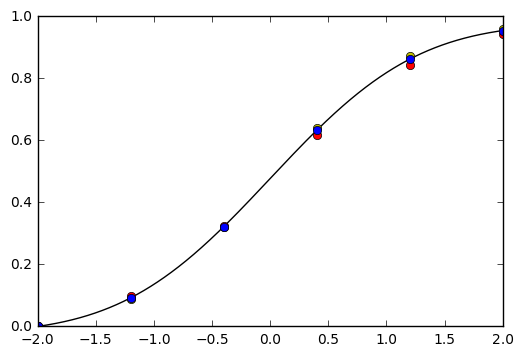

In [500]:
num = max((int)(b - a), 5)
points, values = integralUpp(lam_func, a, b, 10000, centrRecApprox)
points1, values1 = integralUpp(lam_func, a, b, num, centrRecApprox)
points2, values2 = integralUpp(lam_func, a, b, num, trapeziaApprox)
points3, values3 = integralUpp(lam_func, a, b, num, simpsonApprox)
plt.plot(points, values, 'black', points1, values1, 'oy', points2, values2, 'or', points3, values3, 'ob')
plt.show()